In [1]:
import csv
import numpy as np
from heston import fourier_call_price
import pandas as pd

df= pd.read_csv('stock_p.csv',index_col = 0)
S= df['2'].tolist()
r = 0.1
rho = -0.4
kappa = 3
theta = 0.05
sigma = 0.25
v0 = 0.07
#with open("heston_calib2.csv", mode='w') as f:
#    writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
for St in S:
    prices = []
    for T in [0.5, 1, 1.5, 2]:
        for K in np.arange(85, 125, 5):
            price = fourier_call_price(kappa, theta, sigma, rho, v0, r, T, St, K)
            #prices.append(price)
            print (T, K, price)
    break
        #writer.writerow(prices + [St, r])
        

0.5 85 9.93846176552129
0.5 90 11.598673961324536
0.5 95 11.474750557348997
0.5 100 9.47778012670301
0.5 105 5.92218269859643
0.5 110 1.2842864737193338
0.5 115 -3.9824051420140734
0.5 120 -9.533543571041534
1 85 17.430515278168183
1 90 17.90979411462984
1 95 16.906421096565822
1 100 14.591574770286336
1 105 11.231971668164135
1 110 7.109978645975474
1 115 2.4765576765655624
1 120 -2.468344119956882
1.5 85 23.105404418697645
1.5 90 22.88545051856142
1.5 95 21.466376725300798
1.5 100 19.03860438224479
1.5 105 15.814709441700785
1.5 110 11.996274144123248
1.5 115 7.756844049807867
1.5 120 3.236157198541946
2 85 27.875521278407803
2 90 27.216567168045522
2 95 25.568188988514294
2 100 23.10602186395939
2 105 20.00320283975134
2 110 16.415248620504386
2 115 12.473482649078093
2 120 8.283893831077904


In [3]:
import numpy as np
np.random.seed(10)
def fullTruncationEuler_call_price(S0, K, r, ttm, rho, kappa, theta, sigma, v0):

    M = 10000
    dt = ttm

    payoff = np.zeros(M)
    var = np.zeros(M)
    S = np.zeros(M)
    z2 = np.random.normal(size=(M,))
    z0 = np.random.normal(size=(M,))
    z1 = rho*z2 + np.sqrt(1-rho*rho)*z0
    
    var[:] = v0 + kappa * (theta - v0) * dt + sigma * np.sqrt(v0 * dt) * z1[:]
    var = np.maximum(var, 0.0)
    S[:] = S0 * np.exp((r - 0.5 * var) * dt + np.sqrt(var * dt) * z2[:])
        
    payoff = np.maximum(S - K, 0.0)
    return np.exp(-r*ttm)*np.mean(payoff)
    
S0 = 100.0
K = 85.0
ttm = 2

r = 0.1
rho = -0.4
kappa = 3
theta = 0.05
sigma = 0.25
v0 = 0.07
for ttm in [2]:
    for K in np.arange(85, 125, 5):
        print (fullTruncationEuler_call_price(S0, K, r, ttm, rho, kappa, theta, sigma, v0))
        
#0.5 85 20.13621379153193
#0.5 90 16.16206865327176
#0.5 95 12.583253020223552
#0.5 100 9.477780126703017
#0.5 105 6.892583035895349
#0.5 110 4.8342761332729225
#0.5 115 3.269414276644671
#0.5 120 2.1336107084967324

#2 85 32.44532160694866
#2 90 29.13913504141621
#2 95 26.021266557689742
#2 100 23.10602186395942
#2 105 20.40343090305185
#2 110 17.919050825594617
#2 115 15.654056064643427
#2 120 13.605565437870965

27.28224331337177
23.410628250132117
19.626327014716605
16.210574258718026
12.549010417187121
9.173397962988448
5.84128399801324
2.7397765449192755


In [5]:
def heston_model(S0, r, days, rho, kappa, theta, sigma, v0):

    dt = 1/365

    path = np.zeros(days)
    var = np.zeros(days)

    z2 = np.random.normal(size=(days,))
    z0 = np.random.normal(size=(days,))
    z1 = rho*z2 + np.sqrt(1-rho*rho)*z0
    
    var[0] = v0
    path[0] = S0
    
    for j in range(1, days):
        var[j] = var[j-1] + kappa * (theta - var[j-1]) * dt + sigma * np.sqrt(var[j-1] * dt) * z1[j]
        var[j] = np.maximum(var[j], 0.0)
        path[j] = path[j-1] * np.exp((r - 0.5 * var[j]) * dt + np.sqrt(var[j] * dt) * z2[j])
    
    return path
    
S0 = 100.0
r = 0.1
rho = -0.4
kappa = 3
theta = 0.05
sigma = 0.25
v0 = 0.07

p = heston_model(S0, r, 91, rho, kappa, theta, sigma, v0)

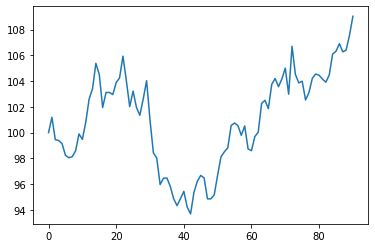

In [7]:
from matplotlib import pyplot as plt
plt.plot(p)
plt.show()